In [1]:
# Cell: setup
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

ROOT = os.path.dirname(os.path.dirname(__file__)) if "__file__" in globals() else ".."
DATA = os.path.join(ROOT, "data")
FIGS = os.path.join(ROOT, "figures")
os.makedirs(FIGS, exist_ok=True)

df = pd.read_csv(os.path.join(DATA, "germany_gdp_percapita_after_1960.csv")).sort_values("year")
df.head()


,year,income
0,1960,8000
1,1980,18000
2,2000,26000
3,2010,42000
4,2020,46000


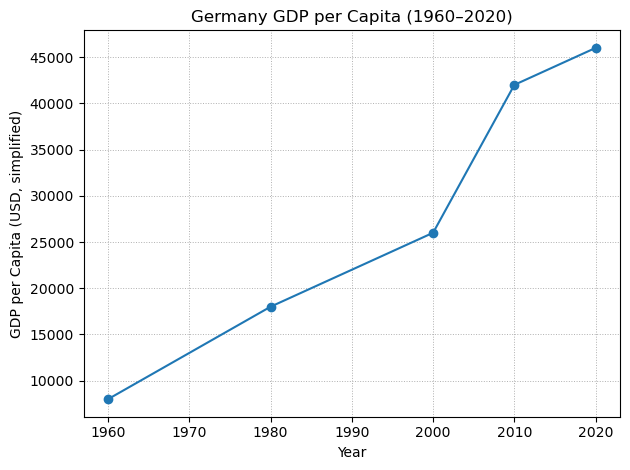

In [2]:
# Cell: chart 1 – historical line (1960–2020)
plt.figure()
plt.plot(df["year"], df["income"], marker="o")
plt.title("Germany GDP per Capita (1960–2020)")
plt.xlabel("Year")
plt.ylabel("GDP per Capita (USD, simplified)")
plt.grid(True, linestyle=":", linewidth=0.7)
plt.tight_layout()
plt.savefig(os.path.join(FIGS, "germany_gdp_trend.png"), dpi=180)
plt.show()


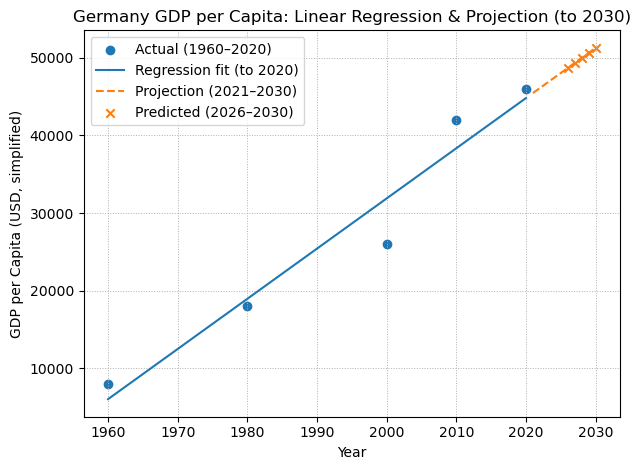

In [3]:
# Cell: chart 2 – regression fit + projection to 2030
X = df[["year"]].values
y = df["income"].values
model = LinearRegression().fit(X, y)

years_all = np.arange(df["year"].min(), 2031)
pred_all = model.predict(years_all.reshape(-1, 1))
future_mask = years_all >= 2021

plt.figure()
plt.scatter(df["year"], df["income"], label="Actual (1960–2020)")
plt.plot(years_all[~future_mask], pred_all[~future_mask], label="Regression fit (to 2020)")
plt.plot(years_all[future_mask], pred_all[future_mask], linestyle="--", label="Projection (2021–2030)")
future_years = np.arange(2026, 2031)
plt.scatter(future_years, model.predict(future_years.reshape(-1, 1)), marker="x", label="Predicted (2026–2030)")
plt.title("Germany GDP per Capita: Linear Regression & Projection (to 2030)")
plt.xlabel("Year")
plt.ylabel("GDP per Capita (USD, simplified)")
plt.legend()
plt.grid(True, linestyle=":", linewidth=0.7)
plt.tight_layout()
plt.savefig(os.path.join(FIGS, "germany_gdp_prediction.png"), dpi=180)
plt.show()


In [4]:
# Cell: save predictions CSV (2026–2030)
years = np.arange(2026, 2031)
preds = model.predict(years.reshape(-1, 1))
out = pd.DataFrame({"year": years, "predicted_income_linear": np.round(preds, 2)})
out_path = os.path.join(DATA, "predictions_2026_2030.csv")
out.to_csv(out_path, index=False)
out


,year,predicted_income_linear
0,2026,48689.66
1,2027,49336.21
2,2028,49982.76
3,2029,50629.31
4,2030,51275.86
